<a href="https://colab.research.google.com/github/gcbirat12/All_Projects/blob/main/Unsupervised_Learning_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality Clustering Analysis

## 1. Introduction

The goal of this project is to apply unsupervised learning techniques to the wine quality dataset to perform exploratory data analysis (EDA) and cluster analysis. This will help us identify patterns and group wines with similar characteristics.

###. Data Collection and Description:
The datasets consist of chemical properties of red and white wines. The columns in both datasets are as follows:

Fixed acidity

Volatile acidity

Citric acid

Residual sugar

Chlorides

Free sulfur dioxide

Total sulfur dioxide

Density

pH

Sulphates

Alcohol

Quality

###2. Data Loading and Initial Exploration



In [14]:
#dataset found in kaggle, Link: https://www.kaggle.com/code/choonmengyap/winesclustering-eda-kmeans-mlp

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Load the datasets
red_wine = pd.read_csv("/content/drive/My Drive/Wine/winequality-red.csv")
white_wine = pd.read_csv("/content/drive/My Drive/Wine/winequality-white.csv")
# Combine the datasets and add a 'type' column
red_wine['type'] = 'red'
white_wine['type'] = 'white'
wine_data = pd.concat([red_wine, white_wine], axis=0, ignore_index=True)


wine_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


###3. EDA Procedure

3.1 Summary Statistics


In [17]:
# Summary statistics
wine_data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


3.2. Data Visualization

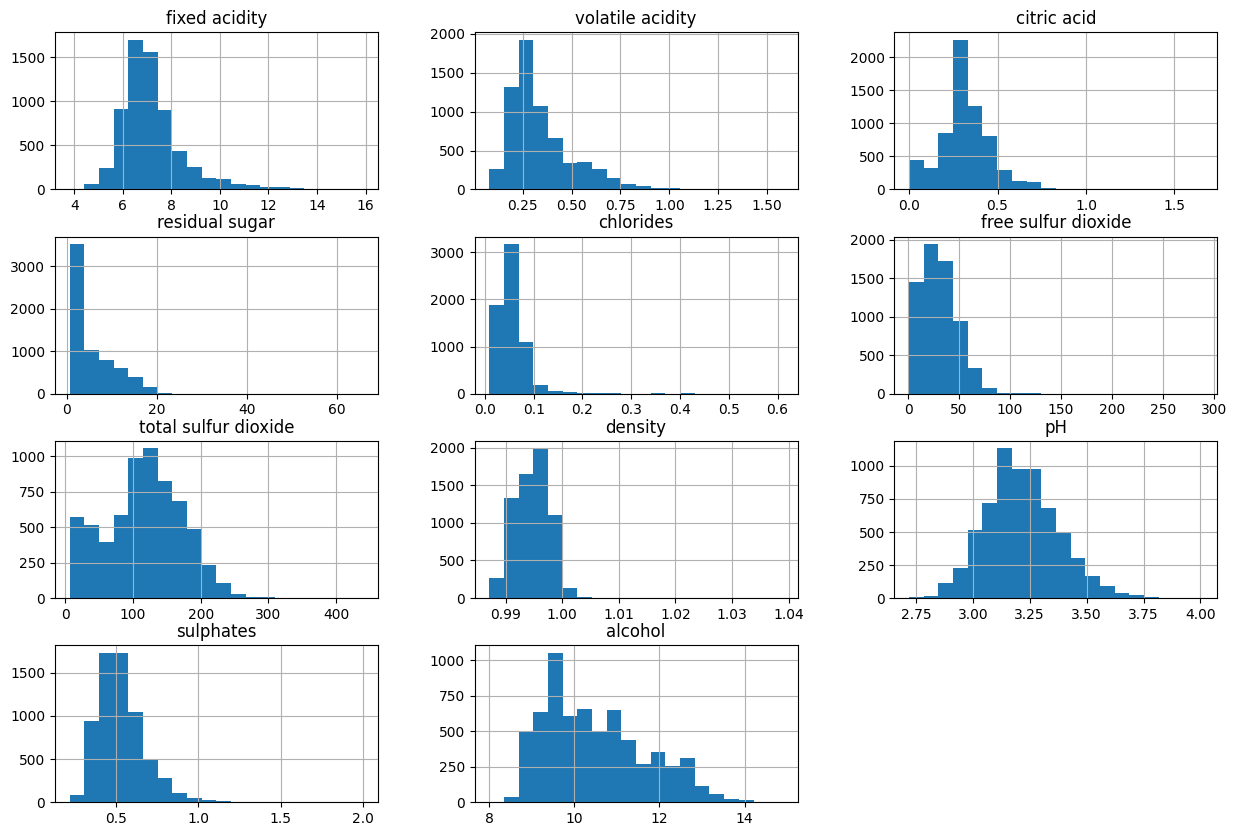

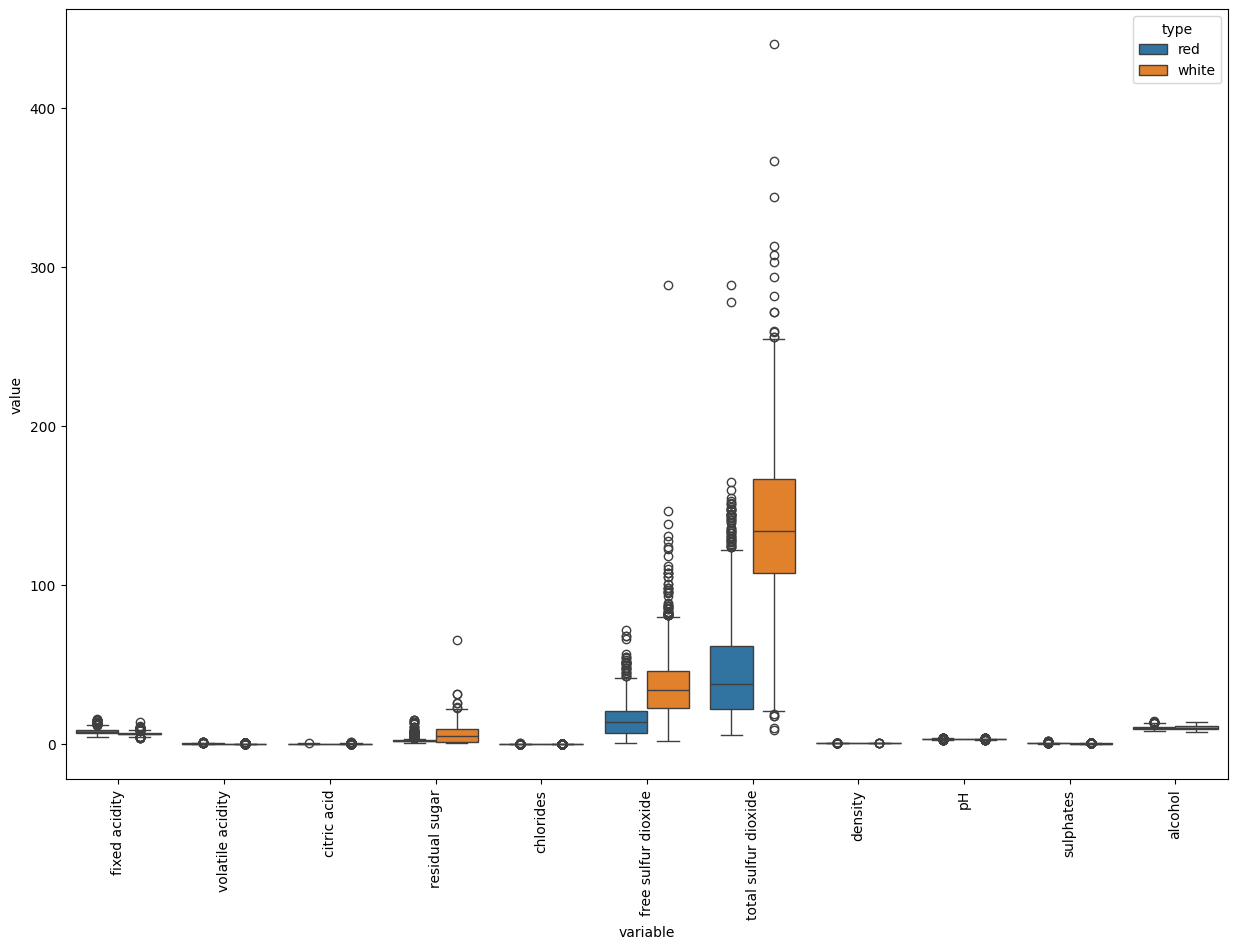

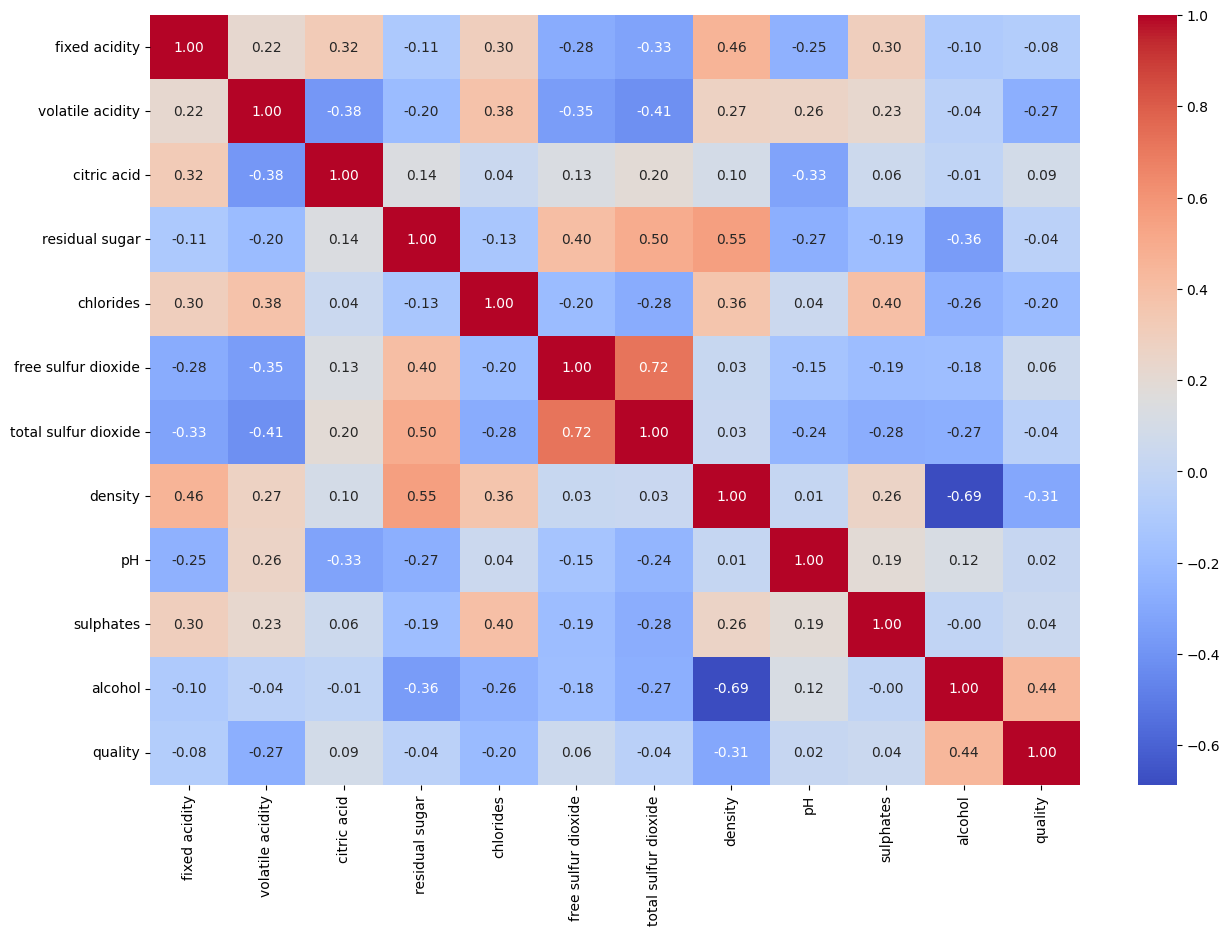

In [22]:
features = wine_data.drop(columns=['quality', 'type'])
target = wine_data['type']

# Histogram of features
features.hist(bins=20, figsize=(15, 10))
plt.show()

# Boxplot by wine type
melted_wine_data = pd.melt(wine_data, id_vars=['type'], value_vars=features.columns)
plt.figure(figsize=(15, 10))
sns.boxplot(x='variable', y='value', hue='type', data=melted_wine_data)
plt.xticks(rotation=90)
plt.show()

# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(wine_data.drop(columns=['type']).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

Histograms of Features:

The histograms display the distribution of various chemical properties of the wines, such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol.
These histograms help in understanding the spread and central tendency of each feature.

Boxplots by Wine Type:

The boxplots compare the distribution of chemical properties between red and white wines.
They provide a clear visual of the differences in median values, interquartile ranges, and the presence of outliers for each feature across the two wine types.

Correlation Heatmap:

The heatmap shows the correlation between different chemical properties of the wines.
It uses a color scale to represent the strength and direction of the correlations, with red indicating strong positive correlations and blue indicating strong negative correlations.

3.3. Data Cleaning

In [25]:
print(wine_data.isnull().sum())

print(wine_data.duplicated().sum())

wine_data = wine_data.drop_duplicates()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64
0


4. Data Transformation


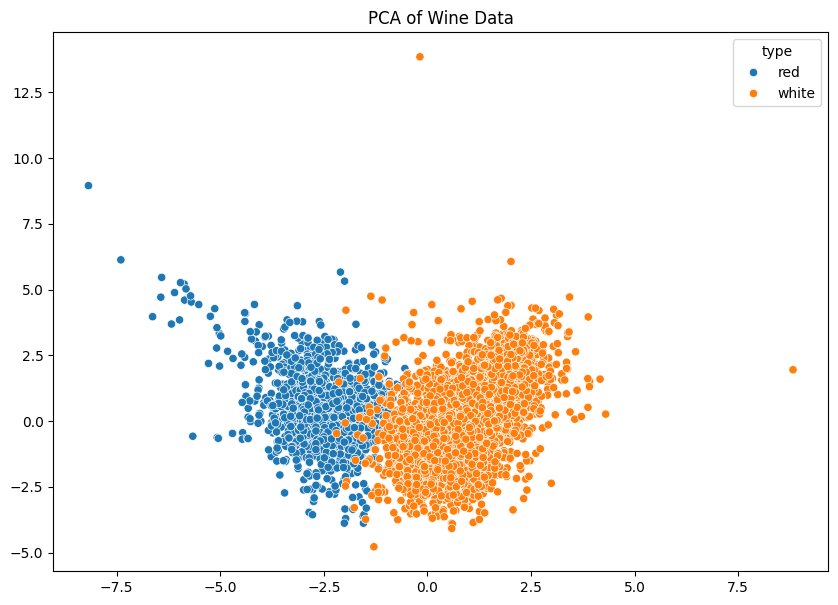

In [27]:
# Standardizing the features
scaler = StandardScaler()
scaled_wine_data = scaler.fit_transform(wine_data.drop(['type', 'quality'], axis=1))

# PCA for dimensionality reduction
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(scaled_wine_data)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=wine_pca[:, 0], y=wine_pca[:, 1], hue=wine_data['type'])
plt.title('PCA of Wine Data')
plt.show()

####5. Model Building and Training

5.1. K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.23011508718955465


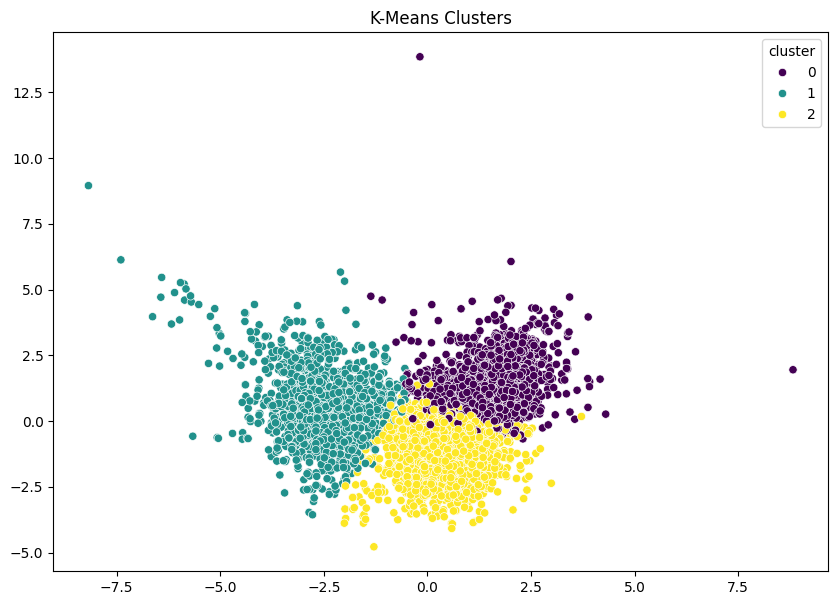

In [28]:
kmeans = KMeans(n_clusters=3, random_state=42)
wine_data['cluster'] = kmeans.fit_predict(scaled_wine_data)

# Silhouette score
silhouette_avg = silhouette_score(scaled_wine_data, wine_data['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

plt.figure(figsize=(10, 7))
sns.scatterplot(x=wine_pca[:, 0], y=wine_pca[:, 1], hue=wine_data['cluster'], palette='viridis')
plt.title('K-Means Clusters')
plt.show()

###6. Discussion and Conclusion


Discussion
Cluster Analysis:

The PCA plot shows three distinct clusters identified by the K-Means algorithm.
Cluster 0 (purple), Cluster 1 (green), and Cluster 2 (yellow) represent different groupings of wines based on their chemical properties.
The clusters overlap slightly, indicating some similarities among the wines but also distinct differences captured by the clustering algorithm.

Silhouette Score:

The silhouette score of approximately 0.23 indicates that the clusters are somewhat well-separated but not perfect. A higher silhouette score would indicate better-defined clusters.
The score suggests that while there are distinct groupings, there is still some degree of overlap and ambiguity between the clusters.

Feature Importance:

The PCA transformation helped in visualizing the clusters in a 2-dimensional space, but it also reduced the information from the original dataset.
Further analysis could involve identifying which features are most important in defining the clusters by examining the cluster centroids or performing feature importance analysis.

Conclusion:

The unsupervised learning approach using K-Means clustering revealed three distinct clusters of wines based on their chemical properties. The silhouette score suggests that the clusters are reasonably well-defined but not perfect, indicating room for improvement.

This analysis provides valuable insights into the inherent groupings of wines, which can help winemakers understand the chemical properties that differentiate their products.

Future work could involve:

Exploring different clustering algorithms like DBSCAN or hierarchical clustering.

Performing hyperparameter tuning for K-Means to improve the clustering quality.

Investigating the importance of individual features in defining the clusters.

Next Steps

Further Analysis:

Compare the performance of different clustering algorithms.
Analyze the importance of each feature in the clustering process.

Refinement:

Optimize the number of clusters using methods like the Elbow method or Silhouette analysis.

Application:

Use the clustering results to develop targeted strategies for wine production and marketing.